In [5]:
# Based on seismo-live.org
# tested on my local machine

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = 10, 6

Read waveform data and inventory data

In [13]:
from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client

client = Client("BGR")                                                          # client specification
t1 = UTCDateTime("2015-12-27T00:00:09.769999Z")                                 # start UTC date/time
t2 = UTCDateTime("2015-12-28T00:00:11.669999Z")                                 # end UTC date/time
st = client.get_waveforms(network="GR", station="FUR",location="*", channel="BHN",
                           starttime=t1, endtime=t2)                            # get data for FUR

In [ ]:
inv = client.get_stations(network="GR", station="FUR",                          # get station service
                                starttime=t1, endtime=t2, channel="*N", level="response")

In [ ]:
print(st)

In [ ]:
print(inv)

In [ ]:
# inv.plot(projection="ortho");
# failed to produce plot

## Compute probabilistic power spectral densities

- using `PPSD` class from `obspy.signal`, see 
http://docs.obspy.org/tutorial/code_snippets/probabilistic_power_spectral_density.html (but use the inventory you read from StationXML as metadata)

- plot the processed `PPSD` (`plot()` method attached to `PPSD` object)

In [35]:
from obspy.signal import PPSD

tr = st[0]
ppsd = PPSD(stats=tr.stats, metadata=inv)

ppsd.add(st)

True

/home/yongki/anaconda3/envs/py38/lib/python3.8/site-packages/obspy/signal/spectral_estimation.py:2096: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(*fig.ppsd.color_limits)


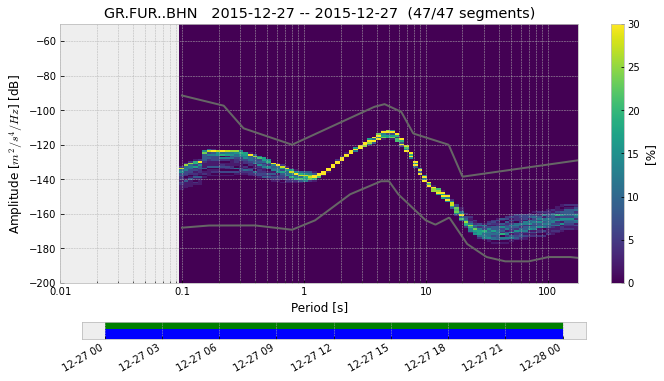

In [36]:
ppsd.plot()

Since longer term stacks would need too much waveform data and take way too long to compute, we prepared one year continuous data preprocessed for a single channel of station `FUR` to play with..

- load long term pre-computed `PPSD` from file `PPSD_FUR_HHN.npz` using PPSD's `load_npz()` staticmethod (i.e. it is called directly from the class, not an instance object of the class)
- plot the PPSD (default is full time-range, depending on how much data and spread is in the data, adjust `max_percentage` option of `plot()` option) (might take a couple of minutes..!)
- do a cumulative plot (which is good to judge non-exceedance percentage dB thresholds)

require large amount of data (1 year) to reproduce.

follow the rest on https://krischer.github.io/seismo_live_build/html/Ambient%20Seismic%20Noise/Probabilistic%20Power%20Spectral%20Densities_wrapper.html